In [1]:
%matplotlib inline
import tensorflow as tf
from d2l import tensorflow as d2l

In [2]:
n_train, n_test , num_inputs, batch_size = 20, 100, 200, 5
true_w, true_b = tf.ones((num_inputs, 1)) * 0.01, 0.05
train_data = d2l.synthetic_data(true_w, true_b, n_train)
train_iter = d2l.load_array(train_data, batch_size)
test_data = d2l.synthetic_data(true_w, true_b, n_test)
test_iter = d2l.load_array(test_data, batch_size, is_train=False)

In [3]:
def init_params():
    w = tf.Variable(tf.random.normal(mean=1, shape=(num_inputs, 1)))
    b = tf.Variable(tf.zeros(shape=(1,)))
    return [w, b]

In [4]:
def l2_penalty(w):
    return tf.reduce_sum(tf.pow(w, 2)) / 2

In [5]:
def accuracy(y_hat, y):  #@save
    """Compute the number of correct predictions."""
    if len(y_hat.shape) > 1 and y_hat.shape[0] > 1:
        y_hat = d2l.argmax(y_hat, axis=1)        
    cmp = d2l.astype(y_hat, y.dtype) == y
    return float(d2l.reduce_sum(d2l.astype(cmp, y.dtype)))


In [6]:
def evaluate_accuracy(net, data_iter):  #@save
    """Compute the accuracy for a model on a dataset."""
    metric = d2l.Accumulator(2)  # No. of correct predictions, no. of predictions
    for _, (X, y) in enumerate(data_iter):
        metric.add(accuracy(y,net(X)), d2l.size(y))
    return metric[0] / metric[1]


In [15]:
def train_concise_with_animation(wd, learning_rate = 0.003, animate_results = True, num_epochs =  100):
    net = tf.keras.models.Sequential()
    net.add(
        tf.keras.layers.Dense(1,kernel_regularizer = tf.keras.regularizers.l2(wd))
    )
    net.build(input_shape=(1, num_inputs))
    loss = tf.keras.losses.MeanSquaredError()
    updater = tf.keras.optimizers.SGD(learning_rate=lr)
    ##animator = d2l.Animator(xlabel='learning rate(' + str(learning_rate) + ')' + ' weight decay(' + str(wd) + ')', xlim=[0.0003, 0.3], legend=['train loss'])
    animator = d2l.Animator(xlabel='epochs with learning rate(' + str(learning_rate) + ')' + ' weight decay(' + str(wd) + ')', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            with tf.GradientTape() as tape:
                y_hat = net(X)
                    # `tf.keras` requires retrieving and adding the losses from
                    # layers manually for custom training loop.
                l = loss(y_hat, y) + net.losses
            grads = tape.gradient(l, net.trainable_variables)
            updater.apply_gradients(zip(grads, net.trainable_variables))
            if (epoch + 1) % 5 == 0:
                animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss),
                                     d2l.evaluate_loss(net, test_iter, loss)))

Use a validation set to find the optimal value of  λ . Is it really the optimal value? Does this matter?

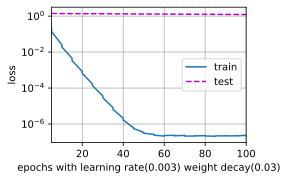

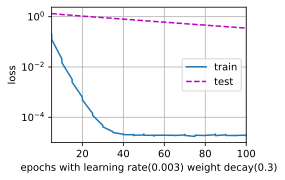

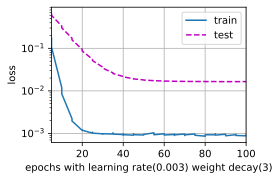

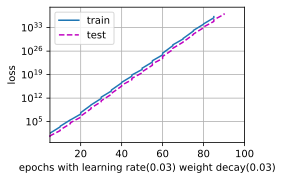

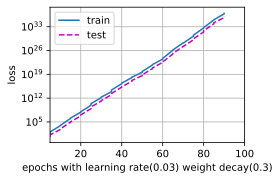

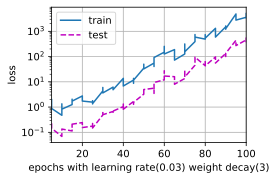

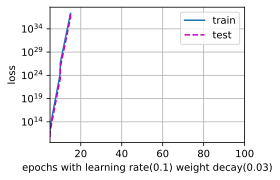

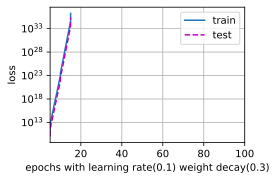

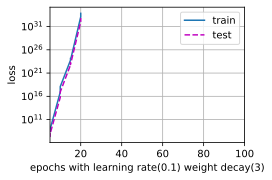

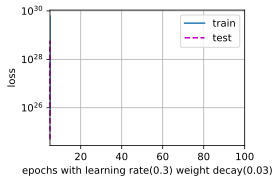

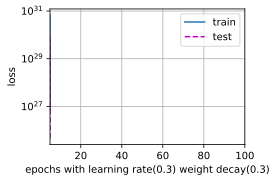

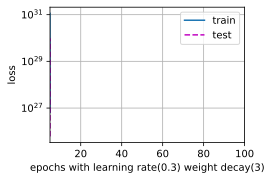

In [16]:
for lr in [0.003,0.03,0.1, 0.3]:
    for wd in [.03, .3, 3]:
        train_concise_with_animation(wd , learning_rate = lr)